<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>



## Introduction.
In this notebook, we will analyze the methods to match a given mathematical model to a Python solver code. In other words, how to go from one to the other. This in the context of combinatorial optimizations.
I start with a total beginner level, then I complicate things as the notebook progresses.



*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN




## Summary

1. <b> Mathematical symbols and vocabulary to know. </b>
2. <b> Begginer method using a simple problem </b>
- 2.A Presentation of the problem 
- 2.B Modeling of a basic instance using hard values
- 2.C Python Pulp solution
- 2.D Cplex solution
3. <b> Extension of our problem and Σ summation symbol discovery . </b>
- 3.A Presentation of the problem in a table
- 3.B Mathematical modeling and difference between instance and model
- 3.C Programming of the Σ summation symbol in the Python solver
    - With Python Pulp
    - With Python Cplex
    - With GLPK online command
4. <b> Getting Familiar with Aij constraints writing using a simple example taken from Hillier </b>
- 4.A Presentation of the problem in a table
- 4.B Mathematical modeling and nomenclature
- 4.C Aij solution and programming with Python Pulp
- 4.D Comparing the Hillier Lingo solver solution to the Python Pulp one.
5. <b> Getting Familiar with an objective function including a Σ  and a cost subtraction. </b>
- 5.A Presentation of the problem in a table
- 5.B Mathematical modeling
- 5.C Python Pulp solution
6. <b>Getting familiar with double summation writing ΣΣ and Xij decisions variables</b>
- 6.A Presentation of the Aarvik and Randolph (1975) transportation problem
- 6.B Mathematical modeling focused on the double summation and Xij decisions variables
- 6.C Python Pulp solution
- 6.D Comparing the Aarvik and Randolph solution to the Python Pulp one.
7. <b>Getting familiar with logical/conditional constraints</b>
- 7.A Best available ressources on the internet and table summaries
- 7.B IF-THEN projects selections examples
    - 7.B.1 Presentation of the capital budgeting problem
    - 7.B.2 Mathematical modeling
    - 7.B.3 Solution using Python Pulp and Book's Excel solution comparison
    - 7.B.4 Mathematical modeling of conditional constraints.
        - Association
            - Solution using Ibm Cplex
            - Solution using Python Pulp    
        - Exclusion
            - Solution using Ibm Cplex
            - Solution using Python Pulp   
        - At least
            - Solution using Ibm Cplex
            - Solution using Python Pulp  
- 7.C IF-THEN Fixed costs example
    - Presentation of the Fixed costs problem
    - Mathematical modeling of conditional constraints.
    - Solution using Ibm Cplex
    - Solution using Python Pulp
- 7.D OR example
    - Big M method discovery.
    - Solution using Ibm Cplex
    - Solution using Python Pulp
- 7.E AND example
    - Mathematical modeling of conditional constraints.
    - Solution using Ibm Cplex
    - Solution using Python Pulp
8. <b> Modeling of a bin packing problem </b>
- Difference between bin packing pbs
- Presentation of the problem in a table
- Mathematical modeling
- Python Pulp solution
9. <b> Modeling of a blending problem </b>
- Presentation of the problem in a table
- Mathematical modeling
- Python Pulp solution
10. <b> Modeling of a set covering problem </b>
- Presentation of the problem in a table
- Mathematical modeling
- Solution with Python 
11. <b> Modeling a chemistry combinatorial optimization  </b>
- Presentation of the Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
- Mathematical modeling
- Python Pulp or Cplex solution
11. <b> Modeling a petroleum combinatorial optimization </b>
- Presentation and Kirchhoff constraints
- Mathematical modeling
- Python Pulp or Cplex solution
12. <b> Linearizations, breakpoints, piecewize functions... </b>
- Linearization technics using the AIMMS modeling guide
- Applications
- Examples using Python solvers
13. <b> Tackle non-linear optimizations </b>
- How to detect a non-linear problem
- Local or global solution?
- What solver to use?
- Presentation of the problem in a table
- Mathematical modeling
- Solution with the Python solver
14. <b> Modeling of a non linear Production mixe optimization</b>
- Presentation of the problem in a table
- Mathematical modeling
- Gekko and Cplex solution
15. <b> Modeling of a non linear location allocation model</b>
- Presentation of the Beer Belge Ronald Rardin " Optimizations in O.R" 2nd edition
- Mathematical modeling
- Gekko and Cplex solution
16. <b> Modeling of a non linear Portfolio optimization</b>
- Presentation of the problem in a table
- Mathematical modeling
- Gekko and Cplex solution



# 1. Mathematical symbols and vocabulary to know:



<div style="text-align:center">
<img src="img/ensemble-plat-moderne-de-thème-d-éducation-d-illustration-de-vecteur-de-symboles-mathématiques-d-ic-nes-plates-colorées-de-86917716.webp" width="100">
</div>

- The symbol <b> Σ </b> (sigma), it learns in second class and makes it possible to simplify the writing of an addition.

- The symbol <b> ∈ </b> means "belongs to", we use it when we first defined a set S {x1, x2 ... xn}

- The symbol <b> ∀ </b> (quantifier) ​​means "for all".

- An <b> Aij matrix </b>: i is the row, j it's the column.So if we are told about value A14, this is the value of row 1 column 4.

- An <b> Objective function </b>: it is intended to be minimized or maximized, when the solver calculates the best values ​​of the decision variables

- <b>Decision variables </b>: a decision variable contains a value which will then be calculated by the solver to be the best possible value to minimize or maximize an objective function (that's it, optimization).The best known algorithm is the simplex.

- <b> "subject to"  </b> means that the objective function is subject to constraints that we write under the "subject to" sentence.

- <b> ℕ </b> is the set of positive integers including 0, <b> n ∗ </b> omens zero.It is generally used to specify the nature of the decision variables, they can therefore be integer, continuous or binary.

- <b> "Expressed in kg" </b> This formulation "expressed in" is important because in operations research, we are constantly juggling with S.Is, the international system for the rating of internationally recognized units.Omitting this specification can lead to many problems, especially during optimizations in percentages, or when it is necessary to transpose into another S.I, example, of kilos in tons, from euros to dollars.

# <b>2. First method using a simple problem </b>

 We're going to take a fairly simple production mix model.
 In beginner problems, at the beginning, we don't have to use the summation symbol, since we generally have few variables, by deduction, we don't have to iterate with the solver. It is therefore much simpler to
 understand, at the beginning

## 2.A Presentation of the problem 

<div style="text-align:center">
<img src="img/000171013_896x598_c.jpg" width="500"/>
</div>

- A company produces car A and car B.
- Car A requires 20 units of K supplies and 10 units of Z supplies.
- Car B requires 18 units of K supplies and 8 units of Z supplies.
- There are 5000 units of K supplies in inventory and 6000 units of Z supplies in inventory.
- Car A has given a profit of 20,000 euros, and car B provides a profit of 18,000 euros.

What cars should the company provide in order to <b> maximize its profit </b>, subject to <b> inventory constraints </b>?


So here, in this problem, we can clearly see that there are few decision variables involved and few constraints. No reason to express the mathematical model with summation symbols, and to do iterations in the Python solver code.

## 2.B Modeling of a basic instance using hard values

Let

- A be the number of A car units to be produced (it is a decision variable)
- B be the number of B car units to be produced (it is a decision variable)

<b> The objective function r </b> is to maximize the profit: <br>

Max (r) = 20000A + 18000B

<b> The constraints </b> are inventory constraints: <br>

K inventory : <br> 
20A + 18B <= 5000

Z inventory :<br> 
10A + 8B <= 6000

## Let's write the instance

Max(R) = 20000A + 18000B<br>
S.T<br>
20A + 18B <= 5000<br>
10A + 8B <= 6000<br>
With<br>
{A,B} ∈ ℕ<br>

## 2.C Python Pulp solution

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

This is a basical optimization code, done with Python Pulp Solver.

In [47]:
# The basic method:
# -----------------------------------
# Import from Python Pulp
# -------- ---------------------------
from pulp import *
# -----------------------------------
# Type of problem
# -----------------------------------
# We choose to solve a Maximization problem
model = LpProblem ( 'Problem' , LpMaximize )
# -----------------------------------
# Decision variables
# -----------------------------------
A = LpVariable ( "A" , lowBound = 0 , cat = 'Integer' ) # Create a variable x >= 0
B = LpVariable ( "B" , lowBound = 0 , cat = 'Integer' ) # Create a variable y >= 0
# -----------------------------------
# Objective function R
# -----------------------------------
model += 20000 * A + 18000 * B
# -----------------------------------
# Constraints
# -----------------------------------
model += 20 * A + 18 * B <= 5000 , "k_inventory_product"
model += 10 * A + 8 * B <= 6000 , "z_inventory_product"
# -----------------------------------
# Solution
# ----------- ------------------------
model.solve ()

# We print the variables that have their values optimized
for v in model . variables ():
    print( v . name , "=" , v . varValue )

# The value of the optimized objective function is printed to the screen 
print ( "Maximized total profit = " , value ( model.objective ) )

A = 7.0
B = 270.0
Maximized total profit =  5000000.0


## 2.D Solution using CPLEX

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>


Let's see how syntax differs from Python Pulp. We see that the maximized total profit is the same, but decisions variables values differs.

In [48]:
# The basic method:
# -----------------------------------
# Import from CPLEX
# -------- ---------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model

# -----------------------------------
# Type of problem
# -----------------------------------
# We choose to solve a Maximization problem
model = Model(name='Problem', log_output=True)

# -----------------------------------
# Decision variables
# -----------------------------------
A = model.integer_var(name='A')
B = model.integer_var(name='B')

# -----------------------------------
# Objective function R
# -----------------------------------
model.maximize(20000 * A + 18000 * B)

# -----------------------------------
# Constraints
# -----------------------------------
model.add_constraint(20 * A + 18 * B <= 5000)
model.add_constraint(10 * A + 8 * B <= 6000)

# -----------------------------------
# Solution
# ----------- ------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 5000000
status: OPTIMAL_SOLUTION(2)
  A=250


# <b>3. Extension of our problem and Σ summation symbol discovery .</b>

Now let's say the company produces 12 different cars, each requiring a different quantity of supply K and Z, and each providing a different profit. The goal is still to determine which cars are best to produce, in
order to maximize our profit subject to inventory constraints.
 
Isn't it boring to retype each value by hand? Yes, it is boring.

Wouldn't it be more convenient to use the summation mathematical symbol when we are going to write the mathematical model, and to iterate over an array in the Python solver code? This is in order to synthesize the expression of our optimization? Which will allow us to communicate easily and internationally about our optimization, and to be understood quickly?

So now let's try to model our mathematical optimization model, by deducing it from our data. We will use the summation symbol, then, we will iterate in the Python code, to obtain our final linear optimization.

## Table of supplies needed for the 12 cars.

<div style="text-align:center">
<img src="img/car-table.png" />
</div>

## We deduce the mathematical instance from this.

Let's write this instance in hard copy, in order to understand how boring it is.

Let
- A be the number of A car units to be produced (it is a decision variable)
- B be the number of B car units to be produced (it is a decision variable)
- C be the number of C car units to be produced (this is a decision variable)
- D be the number of D car units to be produced (this is a decision variable)
- E be the number of E car units to be produced (it is a decision variable)
- F be the number of F car units to be produced (it is a decision variable)
- G be the number of G car units to be produced (this is a decision variable)
- H be the number of H car units to be produced (this is a decision variable)
- I be The number of I car units to be produced (this is a decision variable)
- J be the number of J car units to be produced (this is a decision variable)
- K be the number of K car units to be produced (this is a decision variable)
- L be the number of L car units to be produced (this is a decision variable)

<b>The objective function that we can call R</b> is to maximize the profit:<br>
Max(R) = 20000A + 18000B + 17000C + 21000D + 24000E + 18500F + 20500G + 18500H + 18900I + 21000J + 20500K + 8000L<br><br>

<b>The constraints are the inventory constraints:</b><br>
K inventory:<br>
20A + 18B + 9C + 20D + 22E + 10F + 20G + 12H + 15I + 22J + 21K + 5L <= 5000<br><br>
Z inventory:<br>
10A + 8B +8C + 19D + 24E + 10F + 19G + 10H + 12I + 18J + 20K + 4L <= 6000


## Difference between an instance and a model

What we defined just above is an <b>instance</b> . Let's now see how to model the <b>mathematical model</b> synthesized, from this instance, in the next chapter.

## The mathematical model is modeled using the summation symbol and the indices.

<div style="text-align:center">
<img src="img/modeles-mathematiques-intelligence-artificielle.jpg" width="500"/>
</div>


We can clearly see that above, we have sums, and that writing them by hand is prone to error.

- We note that there are <b> sets </b> that can be <b> Indexed </b>: cars, K supplies, Z supplies, profits.

- We notice that our Table of supplies needed for the 12 cars is similar to <b> an Aij matrix </b>.

<b> Reminder </b>: Let Aij be a matrix: i is the row number, j is the column number. So if we are told about the value A14, it is the value of row 1 column 4 of the matrix.

- We will therefore create <b>a mathematical model</b> , using sets and summation symbols, which will summarize our problem in a simpler and more understandable way; this will be the synthesized version of our optimization.


Then, we can freely create <b>instances</b> of this model with different datas each time, possibly coming from databases. In addition, this model can be used with all solvers on the market, including Excel.

Now let us consider the sets:

- <b>Cj</b> for cars, {A...L} indexed by j
- <b>Kj</b> for supplies K, {20...5} indexed by j
- <b>Zj</b> for supplies Z, {10...4} indexed by j
- <b>Pj</b> for profits {20000...8000} indexed by j

We will already use only the sets to learn how to write the mathematical model, and not the matrix; we will do that later, because it is more complicated to read.

If we want to rewrite the synthesized objective function that maximizes the benefit of the sum of cars:<br>
Max(R) = 20000A + 18000B + 17000C + 21000D + 24000E + 18500F + 20500G + 18500H + 18900I + 21000J + 20500K + 8000

We write it:
$$
Max (R) = \sum_{j=1}^{C} P_{j}.C_{j}
$$

- Why do we index with the letter j? Because by convention, this designates the column of a matrix. You have to imagine in your head iterating over each value and that the value of the letter j is incremented.

If we want to rewrite the first inventory constraint K, in a synthesized way:<br>
20A + 18B + 9C + 20D + 22E + 10F + 20G + 12H + 15I + 22J + 21K + 5L <= 5000

We write it : 
$$
 \sum_{j=1}^{K} K_{j}.C_{j} <= 5000
$$

If we want to rewrite the second inventory constraint Z, in a synthesized way:<br>
10A + 8B +8C + 19D + 24E + 10F + 19G + 10H + 12I + 18J + 20K + 4L <= 6000

We write it:
$$
 \sum_{j=1}^{Z} Z_{j}.C_{j} <= 6000
$$

We arrive at our following synthesized optimization model:

$$
Max (R) = \sum_{j=1}^{C} P_{j}.C_{j}
$$
$$
s.t
$$
$$
 \sum_{j=1}^{K} K_{j}.C_{j} <= 5000
$$
$$
 \sum_{j=1}^{Z} Z_{j}.C_{j} <= 6000
$$
$$
 Cj \in ℕ
$$


<b>Now, constraints are not written like this usually, but refer to the matrix: Source: Linear Programming with Excel by Christian Prins and Marc Sevaux Page 58 and Courses from Taiwan university and Hillier and many others...</b>
We can further reduce our model by reducing the writing of constraints in this way:

$$
  \sum_{j=1}^{C} a_{ij}.C_{j} <= S_{i}
$$

where : 

- aij means that we consider each supply value for each car, for each existing supply row in our data matrix.
- Si means that the value of each current stock is contained in a vector indexed by i, instead of being hard-coded, S is therefore the set of inventory

but, don't worry, we'll study a real case of this Aij notation in chapter 4...

## Now we use Python solvers, wishing to find a solution.

Let's take the objective function of our model:
$$
Max (R) = \sum_{j=1}^{C} P_{j}.C_{j}
$$

So P is the set of profits. So C is the set of cars.<br>
This will involve <b>rewriting this summation symbol</b> of the mathematical model, with <b>several Solvers</b>, in <b>Python language</b> .<br>
The syntax is unfortunately different between solvers, but is often somewhat similar.<br>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


We must of course first enter the data of our initial table in Python, before manipulating them with Solvers, this data is an instance of our optimization . There are several ways to enter this data, and this
then influences the syntax when manipulating the solver, however, we generally find the same syntax, on StackOverflow and by the author of Python Pulp.
It must resemble the mathematical model as much as possible, of course it is necessary to assign strictly the same letters to the sets as in the mathematical model and its nomenclature, this is
MANDATORY.


## There is our instance ( data )

In [49]:
# -----------------------------------
# Data - Instance
# ----------- ------------------------
# Cars names
C = [ 'A' , 'B' , 'C' , 'D' , 'E' , 'F' , 'G' , 'H' , 'I' , 'J' , 'K' , 'L' ]
# Profits per car
P = { 'A' : 20000 , 'B' : 18000 , 'C' : 17000 , 'D' : 21000 , 'E' : 24000 , 'F' : 18500 , 'G' : 20500 , 'H' : 18500 , 'I' : 18900 , 'J' : 21000 , 'K' : 20500 , 'L' : 8000 }

# -----------------------------------
# Type of problem
# -----------------------------------
# We choose to solve a Maximization problem
model = LpProblem ( 'Problem' , LpMaximize )

# -----------------------------------
# Creation of Decision Variables
# -----------------------------------
# We stipulate that these are integer variables, normal, since they are cars, they can't be separable.
c = LpVariable . dicts ( "cars" , C , lowBound = 0 , cat = 'Integer' )


Then, Come on, let's go, for the first time, we recreate the objective function of our mathematical model:

$$
Max (R) = \sum_{j=1}^{C} P_{j}.C_{j}
$$

- With Python Pulp

In [50]:
# -----------------------------------
# Objective function
# -----------------------------------
model += lpSum([P[j] * c[j] for j in C ]), "MAXIMIZE_PROFIT_R_FUNCTION" 

# -----------------------------------
# Explanation
# -----------------------------------
# The previous line dynamically recreates:
# Max(R) = 20000A + 18000B + 17000C + 21000D + 24000E + 18500F + 20500G + 18500H + 18900I + 21000J + 20500K + 8000L
# using iterations, you have to visualize it in your head. It is the equivalent of our mathematical model
# and its summation symbol.

- With Cplex

In [51]:
# Comin soon

- With GLPK, on the command line

In [52]:
# Comin soon

Ok, in chapter 3 , we won't bother about the solution, the goal was to learn to go from a mathematical model, to a python code.
Starting at chapter 4, we'll take care about the solution and compare it to real officials books solutions, to make sure it's identical.

# <b>4. Familiarize yourself with the Aij constraints writing  with a simple example taken from Hillier</b>

## 4.a Presentation of the problem in a table

We have seen previously that the modeling of constraints in the mathematical model often uses the expression aij in the summation symbol. This is a, indexed by i and j. This i means that we iterate on the rows, in addition to iterating on the columns j. This is therefore a double treatment.

Let's take this simple case of production mix optimization, present in the book Hillier, Introduction to operation research 7th edition - page 82

The objective is to maximize profit under the constraint of available production time :


<div style="text-align:center">
<img src="img/hillier-1.png" />
</div>

## 4.b Mathematical modeling

As usual, we first identify the sets that are involved in our mathematical model.
Let's already try to model the <b>objective</b> function R which will maximize the profit:

- Why are the products P0j the decision variables?
Because their respective number will be calculated, in real time, by the solver to obtain the maximum profit under constraints . We will create the set Xj (x1,x2..xn) which are theses decision variables, the j is in index, because we have the columns P01, P02, P03 and P04. By convention, generally, the decision variables are called x, and we use j because by convention, we designate columns. Why not calling this set P, like ' Products' ? Because We need the P letter for the Profit set.

- We see that we have the set Pj(p1,p2..pn) which are the constant values of profit per product supplied. So, here it's the same, we use the index j because by convention, it designates the columns.

We therefore arrive at this objective function, as in Hillier's book:

$$
Max (R) = \sum_{j=1}^{4} p_{j}.x_{j}
$$

We notice that we put 4 at the top of the summation symbol, as a limit, but we could also have put X, to obtain a more generic iteration, because this implies the set X which contains 4 values, but could contain
more.

<b> Now we come to the important part, the constraints.</b>

We see in our table that we have 3 lines of constraints that we can index by i. By convention, i designates the line numbers. Therefore, we will not write a summation symbol per line, which would weigh down our final model, but we will introduce aij which means that we <b>automatically iterate by line and by columns at the same time</b>, so we model our constraints like this, as in Hillier's book:

$$
\sum_{j=1}^{4} a_{ij}.x_{j} <= b_{i}\thinspace\thinspace\thinspace for \thinspace i = 1,2,3
$$

We notice that we have an additional (mandatory) piece of information "For i = 1,2,3", which is logical since there are 3 lines in all. The professor from Taiwan University particularly insists on the fact that we must systematically add this information, and it is present in Hillier's book.

There you have it, we can now rewrite our complete model, including the <b>nomenclature</b> of our sets, below the model.

$$
Max (R) = \sum_{j=1}^{4} p_{j}.x_{j}
$$
$$
S.T
$$

$$
\sum_{j=1}^{4} a_{ij}.x_{j} <= b_{i} \thinspace\thinspace\thinspace for \thinspace i = 1,2,3
$$

$$
Where
$$

$$
 x_{j} = production \thinspace level \thinspace for \thinspace product \thinspace PO_{j}
$$
$$
 p_{j} = unit \thinspace profit \thinspace for \thinspace product \thinspace PO_{j}
$$
$$
 a_{ij} = production \thinspace time \thinspace on \thinspace machine \thinspace i \thinspace per \thinspace unit \thinspace of \thinspace product \thinspace PO_{j}
$$
$$
 b_{i} = production \thinspace time \thinspace available \thinspace per \thinspace week \thinspace on \thinspace machine \thinspace i 
$$

Note: I copied the model from Hillier's book, we can see that there is a strangeness in the nomenclature in the book (b is indexed by i in the nomenclature, and by j in the constraint), which is not exactly the
same as in the model, we will check, but the logic is there, I corrected it and put an i

## 4.c Solution using Python Pulp

Now that we have our mathematical model ready, which we can even call a 'generic model', the second part is to find the solution using a Python solver.
There are of course several, but Python Pulp is recognized as a famous and easy-to-access linear solver.

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

So we have 2 elements, which we are now used to:
- Our data <b>instance</b> which is our informative table from the beginning.
- Our generic <b>mathematical model</b> , which we modeled by deduction.

Our Python Pulp code must therefore be created in two steps: programming the instance, then programming the mathematical model, and must of course respect the elements to the letter, the nomenclature, and the names given to the sets, everything must be strictly identical, including the indentation.

## Step 1
We enter our instance into our Python Pulp optimization program

In [53]:
# -----------------------------------
# STEP 1- We program the Data - which we can also call the Instance
# -----------------------------------
# We retrieve the data from the information table, in order to create an instance of data!
# Our products
X = [ 'P1' , 'P2' , 'P3' , 'P4' ]
# Their respective profits expressed in Dollars
P = { 'P1' : 26 , 'P2' : 35 , 'P3' : 25 , 'P4' : 37 }
# Production time available per machine for a week expressed in hours, it is a vector
B = [ 28 , 34 , 21 ]
# Matrix of production times per machine per product AOj, expressed in hours
A = [
[ 1.7 , 2.1 , 1.4 , 2.4 ],
[ 1.1 , 2.5 , 1.7 , 2.6 ],
[ 1.6 , 1.3 , 1.6 , 0.8 ]
]

# -----------------------------------
# Type of problem
# -----------------------------------
# We choose to solve a Maximization problem
model = LpProblem ( 'Problem' , LpMaximize )

# -----------------------------------
# Creation of Decision Variables
# -----------------------------------
# We stipulate that these are integer variables, normal, since they are non separable products
x = LpVariable . dicts ( "products" , X , lowBound = 0 , cat = 'Integer' )

## Step 2
We enter our mathematical model into our Python Pulp optimization program
First comes the maximization objective function :

$$
Max (R) = \sum_{j=1}^{4} p_{j}.x_{j}
$$

In [54]:
# -----------------------------------
# Objective function
# -----------------------------------
model += lpSum ([ P [ j ] * x [ j ] for j in X ]), "MAXIMIZE_PROFIT_R_FUNCTION"

# -----------------------------------
# Explanation
# -----------------------------------
# The previous line recreated dynamically:
# Max(R) = 26*PO1 + 35*P02 + 25*P03 + 37*P04
# using iterations, you have to visualize it in your head. It is the equivalent of our mathematical model
# and its summation symbol.

Then, it's a little more difficult for the constraints, because we're going to use the expression aij and therefore use and iterate on the matrix A that we defined during step 1. We're also going to use the vector B
of maximum production times.

$$
\sum_{j=1}^{4} a_{ij}.x_{j} <= b_{i} \thinspace\thinspace\thinspace for \thinspace i = 1,2,3
$$

But we will first introduce our instance of data into this portion of the mathematical constraint model by hand, in order to understand what we will do next with the solver. If we place our instance into this
mathematical model, by hand, we obtain:

In [55]:
# 1.7 * PO1 + 2.1 * P02 + 1.4 * P03, 2.4 * P04 <= 28
# 1.1 * PO1 + 2.5 * PO2 + 1.7 * PO3 + 2.6 * PO4 <= 34
# 1.6 * P01 + 1.3 * P02 + 1.6 * PO3 + 0.8 * PO4 <= 21

Now that we have a good understanding of what the constraints that the Python solver expects look like, we need to write the correct syntax of the model, in the Python Pulp solver.

Since <b>we are no longer beginners</b>, we are obviously <b>not going to rewrite the constraints with hard values</b>, we are writing <b>the mathematical model, which will automatically iterate on the data</b>, which could be enormous in the future, if necessary (it's practical, when using databases).

In [56]:
# -----------------------------------
# Constraints
# -----------------------------------
for i , m in enumerate ( B ): # For each line i of minimum production time
    model += lpSum ( [ A [ i ][ idx ] * x [ j ] for idx , j in enumerate ( X ) ]) <= B [ i ] # For each decision variable, specify the machine working time per product

# -----------------------------------
# Explanation
# -----------------------------------
# The Python enumerate function allows you to retrieve the index and value of an array by iterating.
# It is used to recreate the mathematical model
# It is written as follows: for INDEX,VALUE in ENUMERATE(MY ARRAY)

# -----------------------------------
# Explanation 2
# -----------------------------------
# This constraint programming seems impressive, but in reality, it only iterates on our matrix A, and on each of
# its lines, as in the mathematical model. It only dynamically recreates the constraints that we wrote
# in hard in the part a little before.
# We check by printing the model that we find the same constraints, yes, that's the case!
print ( model )

Problem:
MAXIMIZE
26*products_P1 + 35*products_P2 + 25*products_P3 + 37*products_P4 + 0
SUBJECT TO
_C1: 1.7 products_P1 + 2.1 products_P2 + 1.4 products_P3 + 2.4 products_P4
 <= 28

_C2: 1.1 products_P1 + 2.5 products_P2 + 1.7 products_P3 + 2.6 products_P4
 <= 34

_C3: 1.6 products_P1 + 1.3 products_P2 + 1.6 products_P3 + 0.8 products_P4
 <= 21

VARIABLES
0 <= products_P1 Integer
0 <= products_P2 Integer
0 <= products_P3 Integer
0 <= products_P4 Integer



## 4.D Comparing the Hillier's book Lingo solver solution to the Python Pulp one.

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

So, let's now compare the solution found by Python Pulp to the Hillier's book one.
Hillier used the LINGO solver, we are currently using the Python Pulp solver .

In [57]:
# -----------------------------------
# Solution
# ----------- ------------------------
model.solve ()

# We print the variables that have their values optimized
for v in model . variables ():
    print( v . name , "=" , v . varValue )

# The value of the optimized objective function is printed to the screen 
print ( "Maximized total profit = " , value ( model.objective ) )

products_P1 = 0.0
products_P2 = 10.0
products_P3 = 5.0
products_P4 = 0.0
Maximized total profit =  475.0


<b>HEY ! Yes, Solution is the same than the Hillier's book LINGO solver one ! Looks good, bro !</b>

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>


# <b>5.  Getting Familiar with an objective function including a Σ and a cost subtraction. </b>

## 5.A Presentation of the problem in a table
Now that we have confirmed our optimization below in chapter 4, and confirmed the solution is the same than in the Hillier's book, let's add a fixed cost per produced product, and see how it impacts our mathematical model and our Python Pulp programmation.

So, first : Our instance is modified like this :

<div style="text-align:center">
<img src="img/hillier-2.png" />
</div>

## 5.B Mathematical modeling

We can obviously introduce a new set called C , for "costs",and we index it by j, taking care about the 4 columns.
Like the Profit vector in chapter 4, We'll consider it as a vector.
We make sure this costs adding technic is good by reading the well known AMP doc.

So, let's place it in our model.

$$
Max (R) = \sum_{j=1}^{4} (p_{j}-c_{j}).x_{j}
$$
$$
S.T
$$

$$
\sum_{j=1}^{4} a_{ij}.x_{j} <= b_{i} \thinspace\thinspace\thinspace for \thinspace i = 1,2,3
$$

$$
Where
$$

$$
 x_{j} = production \thinspace level \thinspace for \thinspace product \thinspace PO_{j}
$$
$$
 p_{j} = unit \thinspace profit \thinspace for \thinspace product \thinspace PO_{j}
$$
$$
 a_{ij} = production \thinspace time \thinspace on \thinspace machine \thinspace i \thinspace per \thinspace unit \thinspace of \thinspace product \thinspace PO_{j}
$$
$$
 b_{i} = production \thinspace time \thinspace available \thinspace per \thinspace week \thinspace on \thinspace machine \thinspace i 
$$
$$
 c_{j} = cost \thinspace per \thinspace produced \thinspace product\thinspace  
$$

# 5c Python Pulp Solution


Let's first enter our new C set in our data instance.

In [58]:
# Costs 
C = { 'P1' : 0.2 , 'P2' : 0.3 , 'P3' : 0.2 , 'P4' : 0.3 }

Our math model objective function is now different, so let's modify the math model correctly, also inside of the Python Pulp code :.
$$
Max (R) = \sum_{j=1}^{4} (p_{j}-c_{j}).x_{j}
$$

 

In [59]:
# -----------------------------------
# Objective function
# -----------------------------------
model += lpSum ([ (P [ j ] - C [ j ]) * x [ j ] for j in X ]), "MAXIMIZE_PROFIT_R_FUNCTION"

## Checking solution :

Let's rewrite the whole code without previous explanations.
Solution substracted costs and took it in consideration while resolving the linear optimization. We got less profit than before.

In [60]:
from pulp import *
# Instance
X = [ 'P1' , 'P2' , 'P3' , 'P4' ]
P = { 'P1' : 26 , 'P2' : 35 , 'P3' : 25 , 'P4' : 37 }
C = { 'P1' : 0.2 , 'P2' : 0.3 , 'P3' : 0.2 , 'P4' : 0.3 }
B = [ 28 , 34 , 21 ]
A = [
[ 1.7 , 2.1 , 1.4 , 2.4 ],
[ 1.1 , 2.5 , 1.7 , 2.6 ],
[ 1.6 , 1.3 , 1.6 , 0.8 ]
]

# Params
model = LpProblem ( 'Problem' , LpMaximize )
x = LpVariable . dicts ( "products" , X , lowBound = 0 , cat = 'Integer' )

# Math model
model += lpSum ([ (P [ j ] - C [ j ]) * x [ j ] for j in X ]), "MAXIMIZE_PROFIT_R_FUNCTION"

for i , m in enumerate ( B ): 
    model += lpSum ( [ A [ i ][ idx ] * x [ j ] for idx , j in enumerate ( X ) ]) <= B [ i ] 

# Solution
model.solve ()

for v in model . variables ():
    print( v . name , "=" , v . varValue )

print ( "Maximized total profit = " , value ( model.objective ) )
    

products_P1 = 0.0
products_P2 = 10.0
products_P3 = 5.0
products_P4 = 0.0
Maximized total profit =  471.0


# <b> 6. Getting familiar with double summation writing ΣΣ and Xij decisions variables</b>

Let's take this famous PowerCo transportation example from http://www.inf.u-szeged.hu/~london/Linprog/linprog7.pdf , and from - ( - still unknown book - , This example is based on Aarvik and Randolph (1975).
And Let's focus on the double summation only and why it exists , then, we'll find the solution using Python Pulp.
Let's understand how Xij decisions variables works too, cause if we look at chapter 4, we see that we deal with Xj decisions variables, with only one indice, but now, Xij has 2 indices, let's see why.

##  Aarvik and Randolph (1975) transportation problem
Powerco has three electric power plants that supply the needs of four cities. 
Each power plant can supply the following numbers of kilowatt-hours (kwh) of electricity: 
- plant 1 — 35 million
- plant 2 — 50 million 
- plant 3 — 40 million 

The peak power demands in these cities, which occur at the same time (2 P.M.), are as follows (in kwh): 
- city 1—45 million
- city 2—20 million 
- city 3—30 million 
- city 4—30 million 

The costs of sending 1 million kwh of electricity from plant to city depend on the distance the elec-
tricity must travel. Formulate an LP to minimize the cost of meeting each city’s peak
power demand.

## 6A. Our instance table :

<div style="text-align:center">
<img src="img/powerco.png">
</div>


## 6.B Mathematical modeling.

There is the <b>objective function instance</b> to be minimized :
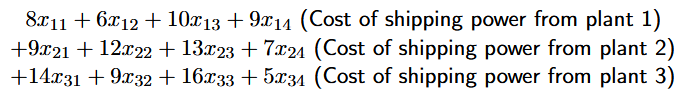

We can see that the decision variables are present on several lines, which implies an Xij type notation because we iterate over the lines and columns to find them. So when in chapter 4, the decision variables are on a single line and we therefore had an Xj type notation which only iterated over the columns.
In other words, instead of having a single line of decision variables, we have an entire table, hence the need to index by i and j at the same time.


There is the <b>Math model objective function</b> :

$$
Min \sum_{i=1}^{i=m} \sum_{j=1}^{j=n} c_{ij}.x_{ij}
$$

we also see that the costs are indexed by i for the rows and j for the columns. Now why are there 2 summation symbols?
It's because number of lines is not equal to the number of rows, and for i = 1, 2, 3 (m=number of lines)and j = 1, 2, 3, 4(n=number of rows)

Now, here are the constraints written in hard :

<div style="text-align:center">
<img src="img/hardcodedconstraints.png" width="500"/>
</div>

Then, converted to a math model : 


$$
\sum_{j=1}^{n} x_{ij} <= s_{i} \thinspace\thinspace\thinspace for \thinspace i = 1,2,3,m
$$

$$
\sum_{j=1}^{m} x_{ij} <= d_{j} \thinspace\thinspace\thinspace for \thinspace j = 1,2,3,4,n
$$

$$
x_{ij} \ge 0 \thinspace (i = 1,2,3...m; j = 1,2,...n)
$$

$$
Where
$$

$$
 x_{ij} = number \thinspace of \thinspace (million) \thinspace kwh \thinspace produced \thinspace at \thinspace plant \thinspace i \thinspace and \thinspace sent \thinspace to \thinspace city \thinspace j
$$

$$
 c_{ij} = cost \thinspace of \thinspace (million) \thinspace kwh \thinspace produced \thinspace at \thinspace plant \thinspace i \thinspace and \thinspace sent \thinspace to \thinspace city \thinspace j
$$

$$
 s_{i} = supply \thinspace available \thinspace per \thinspace plant 
$$

$$
 d_{j} = demand \thinspace per \thinspace city 
$$

$$
 p_{i} = plant_{i}
$$

$$
 ct_{j} = city_{j}
$$





## 6.C Solution using Python Pulp.

Let's enter our instance.

In [61]:
# -----------------------------------
# Instance
# -----------------------------------

# I respect the math nomenclature sets names

# plants
p = ['1','2','3']
# cities
ct = ['A','B','C','D']
# costs
c = [  
            [8,    6,   10,  9],        # 1   CITY
            [9,    12,  13,  7],        # 2
            [14,   9,   16,  5],        # 3

]
# supply per plant
s = { '1' : 35 , '2' : 40 , '3' : 50 }
# demand per city
# d = { 'A' : 45 , 'B' : 20 , 'C' : 30 , 'D' : 30}
d = [45,20,30,30]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('optimisation_transport',LpMinimize)



Now, we have to re-create the Objective function math model.

$$
Min \sum_{i=1}^{i=m} \sum_{j=1}^{j=n} c_{ij}.x_{ij}
$$

It should automatically recreate the following hard coded data :

<div style="text-align:center">
<img src="img/xandj.png" width="500"/>
</div>

In [62]:
# Create a list of all possibilities
Routes = [(w, b) for w in p  for b in ct]

# Create decisions variables list
x = LpVariable.dicts("Route", (p , ct), 0, None, LpInteger)

# Create a cost directory
cost = makeDict([p,ct], c, 0)

# Objective function
Problem += lpSum([cost[w][b]  * x[w][b]  for (w, b) in Routes])

# Let's print model, to make sure our objective function is ok.
print(Problem)


optimisation_transport:
MINIMIZE
8*Route_1_A + 6*Route_1_B + 10*Route_1_C + 9*Route_1_D + 9*Route_2_A + 12*Route_2_B + 13*Route_2_C + 7*Route_2_D + 14*Route_3_A + 9*Route_3_B + 16*Route_3_C + 5*Route_3_D + 0
VARIABLES
0 <= Route_1_A Integer
0 <= Route_1_B Integer
0 <= Route_1_C Integer
0 <= Route_1_D Integer
0 <= Route_2_A Integer
0 <= Route_2_B Integer
0 <= Route_2_C Integer
0 <= Route_2_D Integer
0 <= Route_3_A Integer
0 <= Route_3_B Integer
0 <= Route_3_C Integer
0 <= Route_3_D Integer



And now let's recreate constraints.

$$
\sum_{j=1}^{n} x_{ij} <= s_{i} \thinspace\thinspace\thinspace for \thinspace i = 1,2,3,m
$$

$$
\sum_{j=1}^{m} x_{ij} <= d_{j} \thinspace\thinspace\thinspace for \thinspace j = 1,2,3,4,n
$$

The mathematical model has to be able to recreate to theses hard coded constraints, when feeded by datas :
<div style="text-align:center">
<img src="img/hardcodedconstraints.png" width="500"/>
</div>

Ok, first, I am going to hard code constraints, then we'll try to iterate instead, in a second step.

We can access decisions variables using their indexes.

In [63]:
# Supply constraints
Problem += x["1"]["A"] + x["1"]["B"] + x["1"]["C"] + x["1"]["D"] >=35
Problem += x["2"]["A"] + x["2"]["B"] + x["2"]["C"] + x["2"]["D"] >=50
Problem += x["3"]["A"] + x["3"]["B"] + x["3"]["C"] + x["3"]["D"] >=40

# Demand constraints
Problem += x["1"]["A"] + x["2"]["A"] + x["3"]["A"]  >=45
Problem += x["1"]["B"] + x["2"]["B"] + x["3"]["B"]  >=20
Problem += x["1"]["C"] + x["2"]["C"] + x["3"]["C"]  >=30
Problem += x["1"]["D"] + x["2"]["D"] + x["3"]["D"]  >=30


Problem.solve() 

print('Statut:', LpStatus[Problem.status])
print('Total minimized cost = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Route :',i.name, '=', i.varValue)




Statut: Optimal
Total minimized cost =  1020.0
Route : Route_1_B = 10.0
Route : Route_1_C = 25.0
Route : Route_2_A = 45.0
Route : Route_2_C = 5.0
Route : Route_3_B = 10.0
Route : Route_3_D = 30.0


# Comparing solution to the Book's one

Book screen copy :
<div style="text-align:center">
<img src="img/solution1.png" width="500"/>
</div>

Yes, It's the same than the Excel one , looks good, bro.
<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>



## Now, let's iterate over datas instead of hard coding constraints, We code the mathematical model directly

First, let's redo this Supply constraint: 

$$
\sum_{j=1}^{ct} x_{ij} <= s_{i} \thinspace\thinspace\thinspace for \thinspace i = 1,2,3,m
$$

PLease notice that I stay similar to the math model, as much as possible !

In [64]:
# -----------------------------------
# Constraints
# -----------------------------------

# Supply constraint
for i in p : # For each plant
    Problem += lpSum ( [ x [ i ][ j ] for j in ct ]) >= s[i]

# Model will then automatically create theses lines
# No need to hard code it any more, less pain, if you see what I mean ...
# Problem += x["1"]["A"] + x["1"]["B"] + x["1"]["C"] + x["1"]["D"] >=35
# Problem += x["2"]["A"] + x["2"]["B"] + x["2"]["C"] + x["2"]["D"] >=50
# Problem += x["3"]["A"] + x["3"]["B"] + x["3"]["C"] + x["3"]["D"] >=40


And now, let's program this last demand constraint :

$$
\sum_{j=1}^{m} x_{ij} <= d_{j} \thinspace\thinspace\thinspace for \thinspace j = 1,2,3,4,n
$$

In [65]:
# Demand constraint
for idx,m in enumerate (ct) : # For each city
    Problem += lpSum ( [ x [ i ][ m ] for i in p ]) >= d[idx]

# Model will then automatically create theses lines
# Problem += x["1"]["A"] + x["2"]["A"] + x["3"]["A"]  >=45
# Problem += x["1"]["B"] + x["2"]["B"] + x["3"]["B"]  >=20
# Problem += x["1"]["C"] + x["2"]["C"] + x["3"]["C"]  >=30
# Problem += x["1"]["D"] + x["2"]["D"] + x["3"]["D"]  >=30

Ok, let's rewrite the whole code without comments , and check if solution is still OK.

In [66]:
# -----------------------------------
# Instance
# -----------------------------------

# plants
p = ['1','2','3']
# cities
ct = ['A','B','C','D']
# costs
c = [  
        [8,    6,   10,  9],        # 1   CITY
        [9,    12,  13,  7],        # 2
        [14,   9,   16,  5],        # 3
]
# supply per plant
s = { '1' : 35 , '2' : 50 , '3' : 40 }
# demand per city
# d = { 'A' : 45 , 'B' : 20 , 'C' : 30 , 'D' : 30}
d = [45,20,30,30] # We'll see later why I need to express it like that, and if we can do better.

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('optimisation_transport',LpMinimize)

# -----------------------------------
# MATHEMATICAL MODEL
# -----------------------------------

# -----------------------------------
# Objective
# -----------------------------------

# Create a list of all possibilities
Routes = [(w, b) for w in p  for b in ct]

# Create decisions variables list
x = LpVariable.dicts("Route", (p , ct), 0, None, LpInteger)

# Create a cost directory
cost = makeDict([p,ct], c, 0)

# Objective function
Problem += lpSum([cost[w][b]  * x[w][b]  for (w, b) in Routes])


# -----------------------------------
# Constraints
# -----------------------------------

# Supply constraint
for i in p : # For each plant
    Problem += lpSum ( [ x [ i ][ j ] for j in ct ]) >= s[i]

# Demand constraint
for idx,m in enumerate (ct) : # For each city
    Problem += lpSum ( [ x [ i ][ m ] for i in p ]) >= d[idx]

# -----------------------------------
# Solution
# -----------------------------------

Problem.solve() 

print('Statut:', LpStatus[Problem.status])
print('Total minimized cost = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Route :',i.name, '=', i.varValue)

Statut: Optimal
Total minimized cost =  1020.0
Route : Route_1_B = 10.0
Route : Route_1_C = 25.0
Route : Route_2_A = 45.0
Route : Route_2_C = 5.0
Route : Route_3_B = 10.0
Route : Route_3_D = 30.0


Solution is still the same.

# <b>7. Getting familiar with logical/conditional constraints</b>

## 7.A Best available ressources on the internet and table summaries



<div style="text-align:center">
<img src="img/MIT-Logo-Histoire.jpg" width="300">
</div>


M.I.T courseware great Logical constraints course:
- https://ocw.mit.edu/courses/15-053-optimization-methods-in-management-science-spring-2013/5b3af480d3aacc8c345c9e0ecfdd4ba4_MIT15_053S13_tut09.pdf

- https://ocw.mit.edu/courses/15-053-optimization-methods-in-management-science-spring-2013/resources/mit15_053s13_lec11/

M.I.T complete course : 
- https://ocw.mit.edu/courses/15-053-optimization-methods-in-management-science-spring-2013/pages/lecture-notes/


<div style="text-align:center">
<img src="img/Artboard-3-copy-2-1.png" width="300">
</div>

Newest AIMSS course, including the famous "Integer tricks" turorial : 
- https://documentation.aimms.com/_downloads/AIMMS_modeling.pdf

<div style="text-align:center">
<img src="img/keen.png" width="300">
</div>

Ben Alex Keen Phd tutorial : 
- https://benalexkeen.com/linear-programming-with-python-and-pulp-part-6/

StackExchange case :
- https://math.stackexchange.com/questions/1851140/binary-integer-variables-in-linear-programming





## 7.B.1 Presentation of the capital budgeting problem

Let's examine this example exposed in " Optimizations modeling with spreadsheets" by Kenneth R. Baker.<br>

Division A of the Newton Corporation has been allocated $40 million for capital projects this
year. Managers in Division A have examined various possibilities and have proposed five pro-
jects for the capital budgeting committee to consider. The projects cover a variety of activities
and functional areas, and there is just one of each type.<br>
Each project has an estimated net present value (NPV), and each requires a capital expenditure,
which must come out of the budget for capital projects. The following table summarizes the pos-
sibilities, as they have been provided to the committee, with all figures in millions of dollars.

 <table>
  <tr>
    <th><b>Project</b></th>
    <th>P1</th>
    <th>P2</th>
    <th>P3</th>
    <th>P4</th>
    <th>P5</th>
  </tr>
  <tr>
    <td>NPV</td>
    <td>2.0</td>
    <td>3.6</td>
    <td>3.2</td>
    <td>1.6</td>
    <td>2.8</td>
  </tr>
  <tr>
    <td>Expenditure</td>
    <td>12</td>
    <td>24</td>
    <td>20</td>
    <td>8</td>
    <td>16</td>
  </tr>
</table> 

The committee would like to maximize the total NPV from projects selected, subject to a $40
million limit on capital expenditures. This $40-million constraint makes it impossible to under-
take all five projects; a subset of the five must be selected. 

## 7.B.2 Mathematical modeling

We are now used to model a math model from an instance, so, unlike the book, I do write the maths model directly, retrieving sets, and including the mandatory nomenclature.

$$
Max (Z) = \sum_{j=1}^{5} n_{j}.x_{j}
$$
$$
s.t
$$
$$
 \sum_{j=1}^{e} e_{j}.x_{j} <= 40
$$
$$
x_{j} \in {0,1}
$$

$$
where
$$

$$
 x_{j} = project \thinspace selection
$$
$$
 n_{j} = NPV \thinspace per \thinspace project \thinspace Pj
$$
$$
 e_{j} = expenditure \thinspace per \thinspace \thinspace project \thinspace Pj
$$

<br>
We notice that decisions variables are now binary, and are used to select a j project  or not.
We notice that there is no i indice in this model.





## 7.B.3 Solution using Python Pulp and Book's Excel solution comparison


As always, first comes the Instance, with datas, then the math model is written in Python.
Notice that sets names are stricly the same than in the math model, so it's easy to come from one to the other.

In [67]:
# Instance
X = [ 'P1' , 'P2' , 'P3' , 'P4','P5' ]
n = { 'P1' : 2.0 , 'P2' : 3.6 , 'P3' : 3.2 , 'P4' : 1.6, 'P5':2.8 }
e = { 'P1' : 12 , 'P2' : 24 , 'P3' : 20 , 'P4' : 8, 'P5':16 }


# Params
model = LpProblem ( 'Problem' , LpMaximize )
x = LpVariable . dicts ( "project" , X , lowBound = 0 , cat = 'Binary' )

# Math model
# Objective
model += lpSum ([ n [ j ] * x [ j ] for j in X ]), "MAXIMIZE_Z_FUNCTION"

# Constraints
model += lpSum ( [ e [ j ] * x [ j ] for j in X ]) <= 40

# Solution
model.solve ()

for v in model . variables ():
    print( v . name , "=" , v . varValue )

print ( "Total NPV = " , value ( model.objective ) )

project_P1 = 1.0
project_P2 = 0.0
project_P3 = 1.0
project_P4 = 1.0
project_P5 = 0.0
Total NPV =  6.800000000000001


We see that the book's Excel solution is the same than the one we find using Python Pulp, here is a screen cap of the book :
<div style="text-align:center">
<img src="img/chapter7solution.png">
</div>

Looks good, bro !
<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>


## 7.B.4 Mathematical modeling of conditional constraints.

<h3><b>Association:</b></h3><br>
Regarding the previous problem, let's imagine an additional association constraint, if project 1 is chosen, then project 2 must be chosen.
Let's add this inside of the math model : 
$$
 x_{2} >= x_{1}
$$

Source : 
https://or.stackexchange.com/questions/33/in-an-integer-program-how-i-can-force-a-binary-variable-to-equal-1-if-some-cond

And, now, let's modify the Python Pulp program accordingly :

In [68]:
# Instance
X = [ 'P1' , 'P2' , 'P3' , 'P4','P5' ]
n = { 'P1' : 2.0 , 'P2' : 3.6 , 'P3' : 3.2 , 'P4' : 1.6, 'P5':2.8 }
e = { 'P1' : 12 , 'P2' : 24 , 'P3' : 20 , 'P4' : 8, 'P5':16 }


# Params
model = LpProblem ( 'Problem' , LpMaximize )
x = LpVariable . dicts ( "project" , X , lowBound = 0 , cat = 'Binary' )

# Math model
# Objective
model += lpSum ([ n [ j ] * x [ j ] for j in X ]), "MAXIMIZE_Z_FUNCTION"

# Constraints
model += lpSum ( [ e [ j ] * x [ j ] for j in X ]) <= 40

model +=  x['P2'] >= x['P1']

# Solution
model.solve ()

for v in model . variables ():
    print( v . name , "=" , v . varValue )

print ( "Total NPV = " , value ( model.objective ) )

project_P1 = 0.0
project_P2 = 1.0
project_P3 = 0.0
project_P4 = 0.0
project_P5 = 1.0
Total NPV =  6.4


<h3><b>Exclusion</b></h3><br>

Let's now imagine an additional exclusion constraint, if project 2 is chosen, then project 2 must  not be chosen.
Let's add this inside of the math model :

$$
x_{1} + x_{2} <= 1
$$

In [69]:
# Instance
X = [ 'P1' , 'P2' , 'P3' , 'P4','P5' ]
n = { 'P1' : 2.0 , 'P2' : 3.6 , 'P3' : 3.2 , 'P4' : 1.6, 'P5':2.8 }
e = { 'P1' : 12 , 'P2' : 24 , 'P3' : 20 , 'P4' : 8, 'P5':16 }


# Params
model = LpProblem ( 'Problem' , LpMaximize )
x = LpVariable . dicts ( "project" , X , lowBound = 0 , cat = 'Binary' )

# Math model
# Objective
model += lpSum ([ n [ j ] * x [ j ] for j in X ]), "MAXIMIZE_Z_FUNCTION"

# Constraints
model += lpSum ( [ e [ j ] * x [ j ] for j in X ]) <= 40

model +=  x['P1'] + x['P2'] <= 1

# Solution
model.solve ()

for v in model . variables ():
    print( v . name , "=" , v . varValue )

print ( "Total NPV = " , value ( model.objective ) )

project_P1 = 1.0
project_P2 = 0.0
project_P3 = 1.0
project_P4 = 1.0
project_P5 = 0.0
Total NPV =  6.800000000000001
